In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eig

In [4]:
data = np.array([[3,4],[2,8],[6,9],[10,12]])

In [5]:
data = pd.DataFrame(data, columns=['col1', 'col2'])

In [6]:
data

,col1,col2
0,3,4
1,2,8
2,6,9
3,10,12


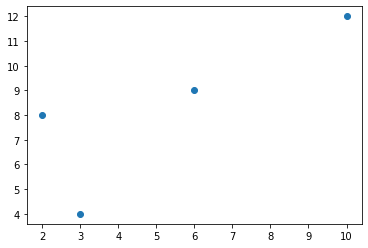

In [8]:
plt.scatter(data['col1'], data['col2'])

Steps:

    1. Standardisation of data
    2. Covariance matrix 
    3. Eigen value and Eigen Vector 
    4. Principal Component

## 1. Standardization of data

In [28]:
# Performing standardization manually

In [29]:
mean_by_col = np.mean(data, axis = 0)
mean_by_col

col1    5.25
col2    8.25
dtype: float64

In [16]:
std_by_col = np.std(data, axis =0)
std_by_col

col1    3.112475
col2    2.861381
dtype: float64

In [18]:
scaled_by_mean = data-mean_by_col
scaled_by_mean

,col1,col2
0,-2.25,-4.25
1,-3.25,-0.25
2,0.75,0.75
3,4.75,3.75


In [20]:
scaled_data = scaled_by_mean/std_by_col

In [30]:
np.array(scaled_data)

array([[-0.7228974 , -1.4852969 ],
       [-1.04418513, -0.08737041],
       [ 0.2409658 ,  0.26211122],
       [ 1.52611672,  1.31055608]])

In [26]:
# Performing same standardization using sklearn

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()

In [25]:
scaler.fit_transform(data)

array([[-0.7228974 , -1.4852969 ],
       [-1.04418513, -0.08737041],
       [ 0.2409658 ,  0.26211122],
       [ 1.52611672,  1.31055608]])

In [33]:
# We got same output:)

## 2. Covariance Matrix

In [45]:
cov_mat = np.cov(scaled_data.T)
cov_mat

array([[1.33333333, 1.07605651],
       [1.07605651, 1.33333333]])

## 3. Eigen Value & Eigen Vectors

In [48]:
np.linalg.eig(cov_mat)

(array([2.40938985, 0.25727682]),
 array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

In [49]:
eig_val, eig_vector = np.linalg.eig(cov_mat)

In [50]:
eig_val

array([2.40938985, 0.25727682])

In [51]:
eig_vector

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

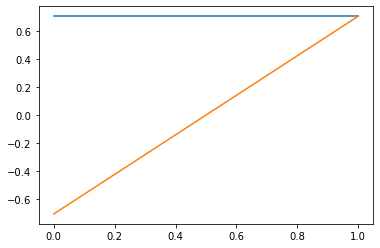

In [52]:
plt.plot(eig_vector)

In [53]:
scaled_data

,col1,col2
0,-0.722897,-1.485297
1,-1.044185,-0.087370
2,0.240966,0.262111
3,1.526117,1.310556


In [55]:
eig_vector.T.dot(scaled_data.T).T

array([[-1.56142916, -0.53909786],
       [-0.80013059,  0.67657018],
       [ 0.35572917,  0.01495207],
       [ 2.00583058, -0.15242439]])

In [56]:
# We can do this entire thing with sklearn library with scaled_data

In [58]:
from sklearn.decomposition import PCA
pca = PCA()

In [64]:
pca_data = pca.fit_transform(scaled_data)
pca_data

array([[-1.56142916, -0.53909786],
       [-0.80013059,  0.67657018],
       [ 0.35572917,  0.01495207],
       [ 2.00583058, -0.15242439]])

In [65]:
# pca_data = pd.DataFrame(data=pca.fit_transform(scaled_data), columns =['pc1', 'pc2'])

In [66]:
pca_data

array([[-1.56142916, -0.53909786],
       [-0.80013059,  0.67657018],
       [ 0.35572917,  0.01495207],
       [ 2.00583058, -0.15242439]])

In [67]:
pca.inverse_transform(pca.fit_transform(scaled_data))

array([[-0.7228974 , -1.4852969 ],
       [-1.04418513, -0.08737041],
       [ 0.2409658 ,  0.26211122],
       [ 1.52611672,  1.31055608]])

In [68]:
pca.explained_variance_ratio_

array([0.90352119, 0.09647881])

We will use first principle component for machine learning as it would capture approximately 90.35% of the total variance in the data.